# <center style="color: green"><strong>RainFall Forecast<strong><center>

#### <strong>Tiền xử lý dữ liệu<strong>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data
date_col = "Date"
rainfall_col = "RF_LeThuy"

df = pd.read_csv('data.csv')
df = df[[date_col, rainfall_col]]

In [3]:
# Set the correct data type
df[date_col] = pd.to_datetime(df[date_col], format = '%m/%d/%Y', errors = 'coerce')
df[rainfall_col] = pd.to_numeric(df[rainfall_col], errors = 'coerce')

In [4]:
# Display missing value
for i in range(len(df.columns)):
  missing_data = df[df.columns[i]].isna().sum()
  perc = missing_data / len(df) * 100
  print(f'> Column {i}[{df.columns[i]}][{df[df.columns[i]].dtypes}]' + 
        f' missing entries: {missing_data}, percentage {perc}%')

> Column 0[Date][datetime64[ns]] missing entries: 0, percentage 0.0%
> Column 1[RF_LeThuy][float64] missing entries: 3, percentage 0.018667164457718873%


In [5]:
# Fill missing value with mode
mode_value = df[rainfall_col].mode()[0]
df[rainfall_col].fillna(mode_value, inplace = True)

In [6]:
from sklearn.cluster import KMeans
wcss = []

# Test with a range of cluster numbers
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(df.iloc[:, 1].values.reshape(-1, 1))
    wcss.append(kmeans.inertia_)
wcss

[3075402.197778281,
 1541823.4032907556,
 924181.0575502398,
 660618.7277849517,
 449809.37745957944,
 338660.7397567606,
 245956.0368002797,
 188923.57328934083,
 145063.71126383715]

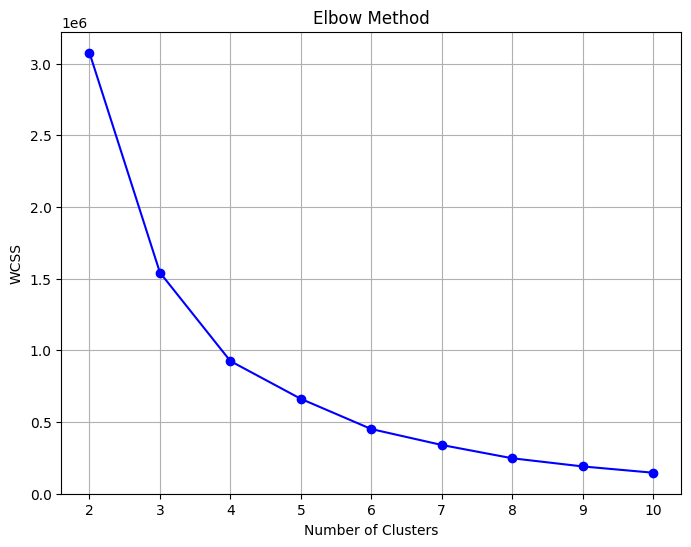

In [7]:
# Plot the result to find the elbow
plt.figure(figsize = (8, 6))
plt.plot(range(2, 11), wcss, marker = 'o', linestyle = '-', color = 'b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

Cluster 0: 15284 data points - centroid: [2.11608218]
Cluster 1: 689 data points - centroid: [60.88867925]
Cluster 2: 98 data points - centroid: [220.94795918]


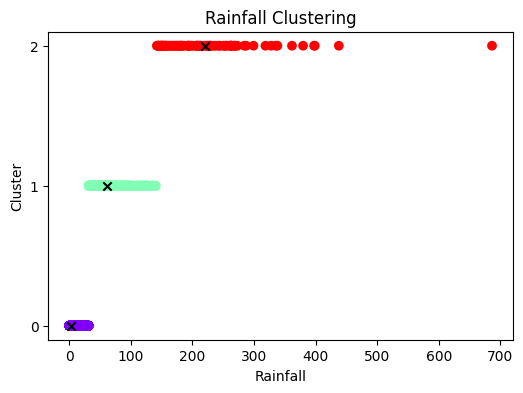

In [8]:
k = 3
kmeans = KMeans(n_clusters = k, n_init = 10)
X = df.iloc[:, 1].values.reshape(-1, 1)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
  print(f"Cluster {i}: {len(labels[labels == i])} data points - centroid: {centroids[i]}")
plt.figure(figsize = (6, 4))
plt.scatter(X, labels, c = labels, cmap = 'rainbow')
plt.yticks([0, 1, 2]) 
plt.scatter(centroids[:, 0], range(k), c = 'black', marker = 'x')
plt.xlabel('Rainfall')
plt.ylabel('Cluster')
plt.title('Rainfall Clustering')
plt.show()

In [9]:
# Add cluster label to dataframe
clustered_data = pd.DataFrame({'Label': labels, 'Value': X.reshape(-1)})
df['Label'] = clustered_data['Label']

- Cluster 0
Minimum rainfall in the cluster: 0.0
Maximum rainfall in the cluster: 31.5
Mode rainfall in the cluster: 0.0
Number of months in the cluster: 12


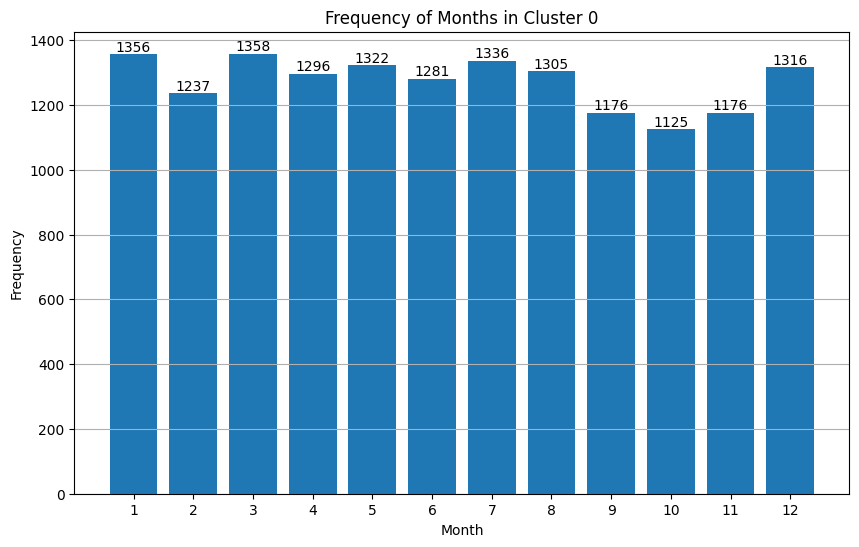

- Cluster 1
Minimum rainfall in the cluster: 31.6
Maximum rainfall in the cluster: 140.5
Mode rainfall in the cluster: 32.2
Number of months in the cluster: 12


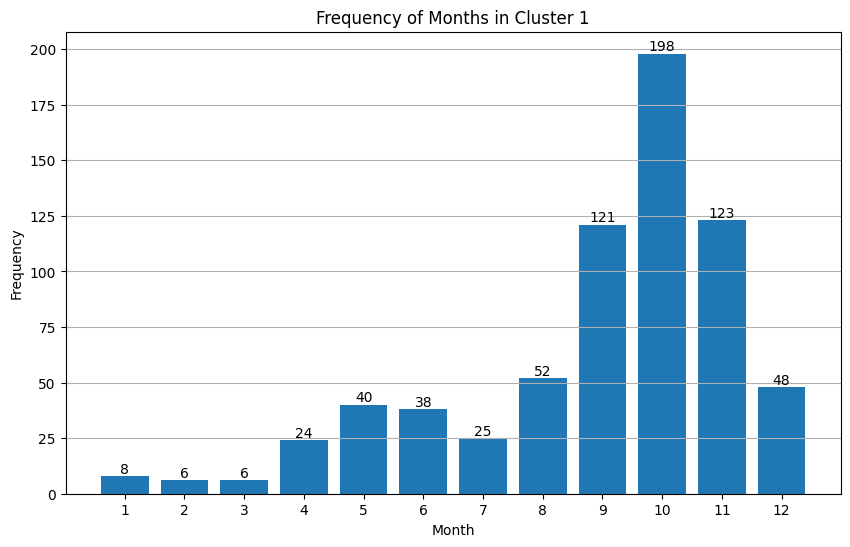

- Cluster 2
Minimum rainfall in the cluster: 142.2
Maximum rainfall in the cluster: 686.6
Mode rainfall in the cluster: 145.0
Number of months in the cluster: 7


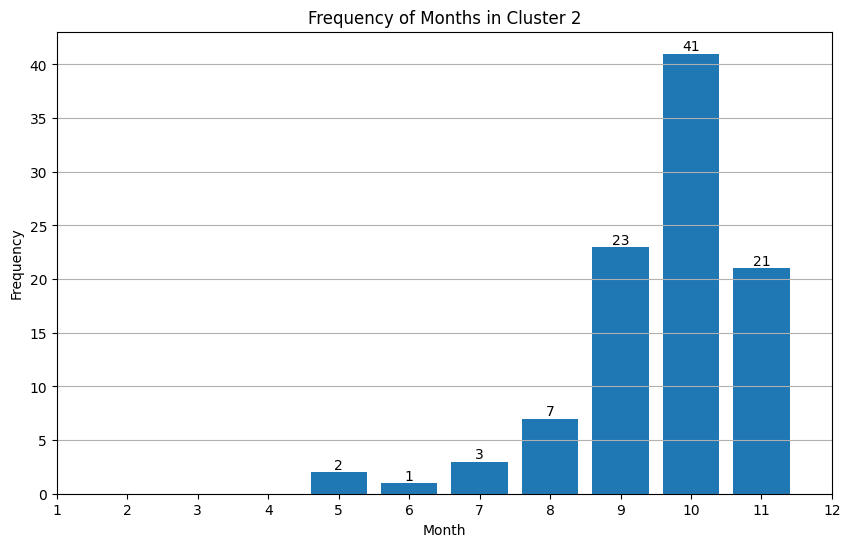

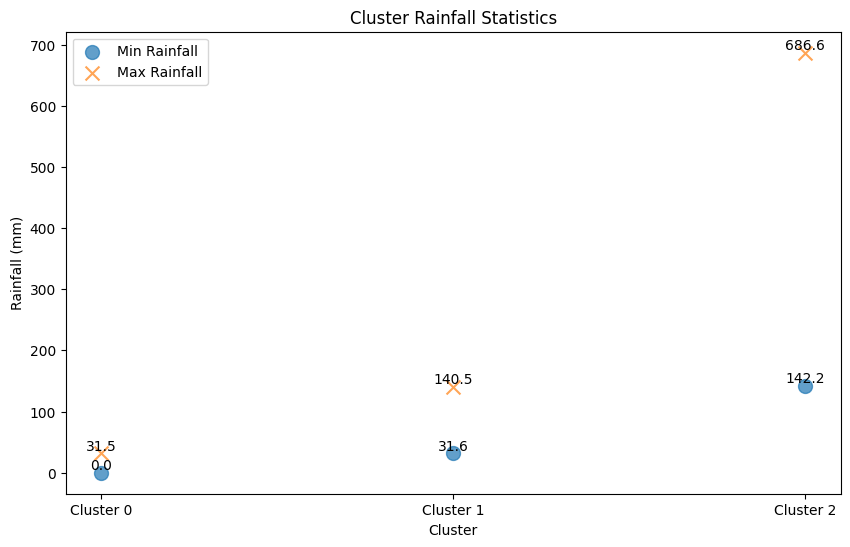

In [10]:
clusters = sorted(df['Label'].unique())

# Lists to store data for plotting
cluster_labels = []
min_rainfall = []
max_rainfall = []

for cluster in clusters:
    cluster_data = df[df['Label'] == cluster]
    month_counts = cluster_data[date_col].dt.month.value_counts()
    print(f'- Cluster {cluster}')
    print(f'Minimum rainfall in the cluster: {min(cluster_data[rainfall_col])}')
    print(f'Maximum rainfall in the cluster: {max(cluster_data[rainfall_col])}')
    print(f'Mode rainfall in the cluster: {cluster_data[rainfall_col].mode()[0]}')
    print(f'Number of months in the cluster: {month_counts.shape[0]}')
    # print(month_counts)

    cluster_labels.append(f'Cluster {cluster}')
    min_rainfall.append(min(cluster_data[rainfall_col]))
    max_rainfall.append(max(cluster_data[rainfall_col]))
    
    plt.figure(figsize=(10, 6))
    plt.bar(month_counts.index, month_counts)
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Months in Cluster {cluster}')
    plt.grid(axis='y')

    # Adding annotations on top of the bars
    for month, count in zip(month_counts.index, month_counts):
        plt.text(month, count, str(count), ha='center', va='bottom')

    plt.xticks(range(1, 13))  # Set x-axis ticks for all months
    plt.show()
    
plt.figure(figsize=(10, 6))
plt.scatter(cluster_labels, min_rainfall, label='Min Rainfall', s=100, marker='o', alpha=0.7)
plt.scatter(cluster_labels, max_rainfall, label='Max Rainfall', s=100, marker='x', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Rainfall (mm)')
plt.title('Cluster Rainfall Statistics')
plt.legend()

# Add labels to data points
for i in range(len(cluster_labels)):
    plt.text(cluster_labels[i], min_rainfall[i], f'{min_rainfall[i]:.1f}', ha='center', va='bottom')
    plt.text(cluster_labels[i], max_rainfall[i], f'{max_rainfall[i]:.1f}', ha='center', va='bottom')

plt.show()


#### Phân loại dữ liệu theo mức độ mưa

https://nchmf.gov.vn/Kttvsite/vi-VN/1/mua-lon-post20892.html

[0] - Không mưa : 0mm

[1] - Mưa nhỏ :  1 - 15mm

[2] - Mưa vừa : 16 - 50mm

[3] - Mưa to : 51 - 100mm

[4] - Mưa rất to : >= 100mm

RF_LeThuy
0    9981
1    4570
2    1055
3     295
4     170
Name: count, dtype: int64


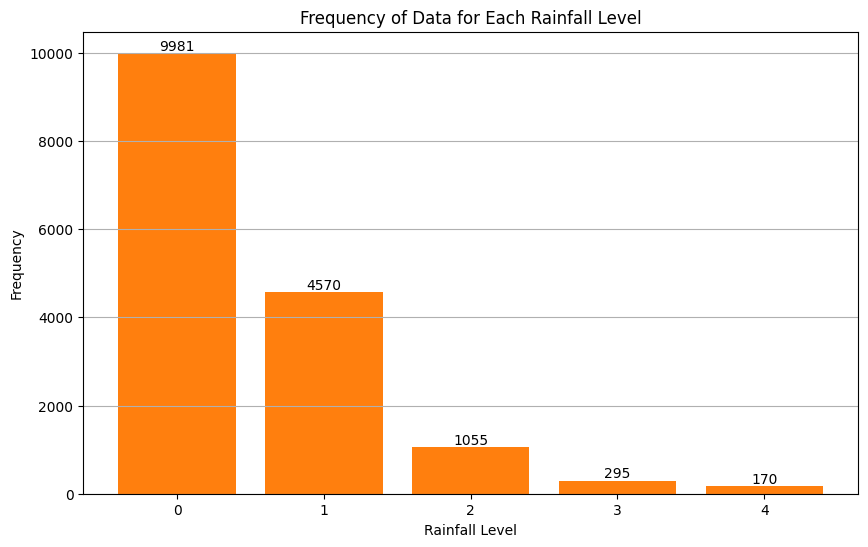

In [11]:
# Categorize the data into 8 levels

def CategorizeRainFall(x):
    if x == 0: return 0
    elif x <= 15: return 1
    elif x <= 50: return 2
    elif x <= 100: return 3
    else : return 4

df[rainfall_col] = df[rainfall_col].apply(CategorizeRainFall)
print(df[rainfall_col].value_counts())

# Bar chart for the number of data for each rainfall level
rainfall_counts = df[rainfall_col].value_counts()
rainfall_levels = [0, 1, 2, 3, 4]

plt.figure(figsize=(10, 6))
bars = plt.bar(rainfall_levels, rainfall_counts)
plt.bar(rainfall_levels, rainfall_counts)
plt.xticks(rainfall_levels)
plt.xlabel('Rainfall Level')
plt.ylabel('Frequency')
plt.title('Frequency of Data for Each Rainfall Level')
plt.grid(axis='y')

# Add labels to the top of each bar
for bar, count in zip(bars, rainfall_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

plt.show()


[0 0 0 ... 0 0 0]
SVM
Accuracy: 0.9732503888024884
MSE: 0.026749611197511663
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3053
           1       1.00      0.38      0.55       139
           2       0.53      1.00      0.70        23

    accuracy                           0.97      3215
   macro avg       0.84      0.79      0.75      3215
weighted avg       0.98      0.97      0.97      3215

[ 0.  0. -0. ...  0.  0.  0.]
Linear Regression
Accuracy: 0.9723172628304821
MSE: 0.027682737169517885
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3053
           1       0.76      0.53      0.62       139
           2       1.00      0.00      0.00        23

    accuracy                           0.97      3215
   macro avg       0.91      0.51      0.54      3215
weighted avg       0.97      0.97      0.97      3215



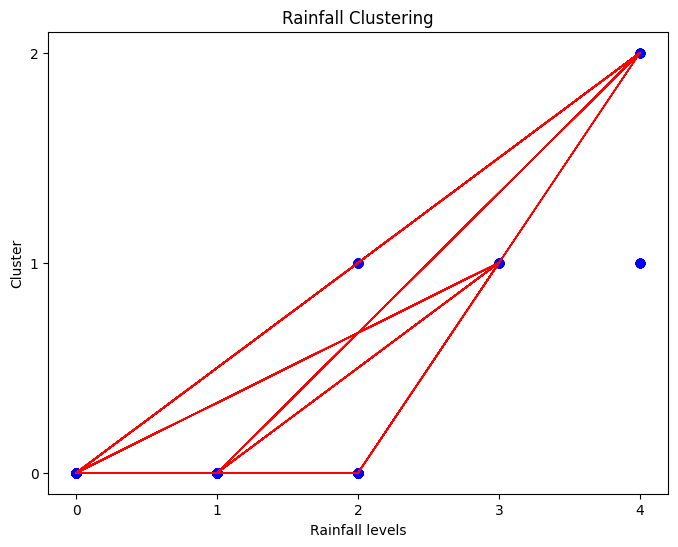

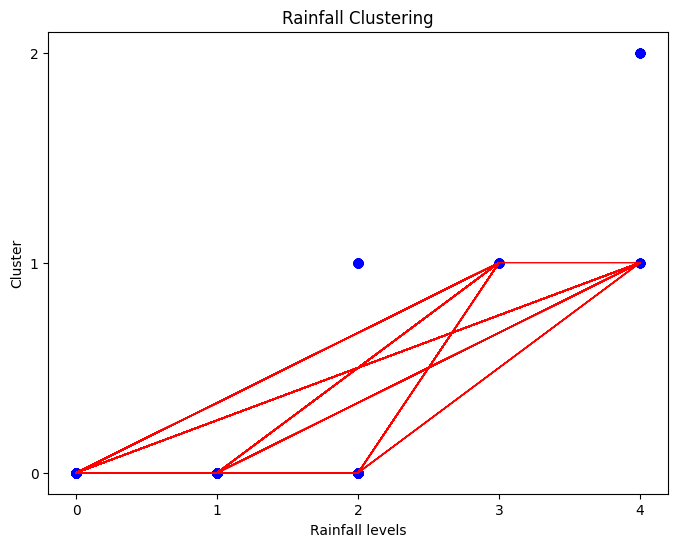

In [12]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, 2].values.reshape(-1, 1).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

# SVM
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_svm_pred = svm.predict(X_test)
print(y_svm_pred)
print('SVM')
print(f'Accuracy: {accuracy_score(y_test, y_svm_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_svm_pred)}')
print(classification_report(y_test, y_svm_pred, zero_division=1))

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
y_lr_pred = y_lr_pred.round()
print(y_lr_pred)
print('Linear Regression')
print(f'Accuracy: {accuracy_score(y_test, y_lr_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_lr_pred)}')
print(classification_report(y_test, y_lr_pred, zero_division=1))

# Plot the result for SVM
plt.figure(figsize = (8, 6))
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_svm_pred, color = 'red', linewidth = 1)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Rainfall levels')
plt.yticks([0, 1, 2])
plt.ylabel('Cluster')
plt.title('Rainfall Clustering')
plt.show()

# Plot the result for Linear Regression
plt.figure(figsize = (8, 6))
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_lr_pred, color = 'red', linewidth = 1)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Rainfall levels')
plt.yticks([0, 1, 2])
plt.ylabel('Cluster')
plt.title('Rainfall Clustering')
plt.show()

#### Phân chia dữ liệu theo tháng 

Dataframe 1
        RF_LeThuy
0              0
1              1
2              1
3              1
4              1
...          ...
16066          0
16067          0
16068          0
16069          1
16070          0

[12067 rows x 1 columns]


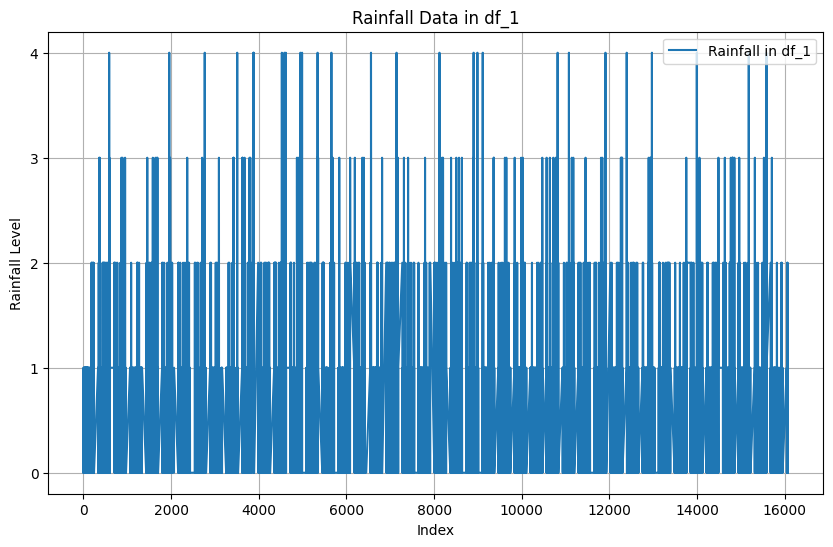

Dataframe 2
        RF_LeThuy
243            1
244            1
245            1
246            4
247            4
...          ...
16035          1
16036          0
16037          2
16038          1
16039          2

[4004 rows x 1 columns]


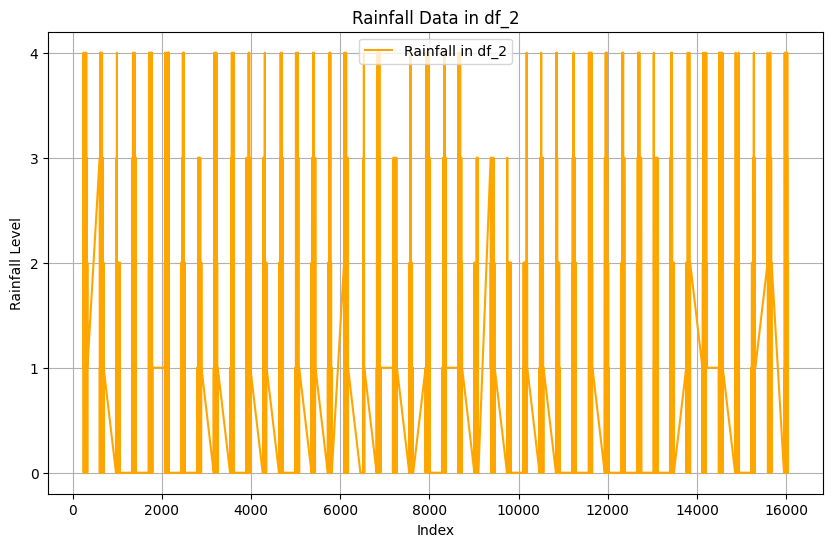

In [13]:
# Split data into 2 dataframes based on the month
df_1 = df[df[date_col].dt.month.between(12, 12) | df[date_col].dt.month.between(1, 8)]
df_1 = df_1.drop(columns = [date_col, 'Label'])

df_2 = df[df[date_col].dt.month.between(9, 11)]
df_2 = df_2.drop(columns = [date_col, 'Label'])

print('Dataframe 1\n',df_1)
# Plot the data for df_1
plt.figure(figsize=(10, 6))
plt.plot(df_1.index, df_1[rainfall_col], label='Rainfall in df_1')
plt.xlabel('Index')
plt.yticks(rainfall_levels) 
plt.ylabel('Rainfall Level')
plt.title('Rainfall Data in df_1')
plt.legend()
plt.grid(True)
plt.show()
print('Dataframe 2\n',df_2)

# Plot the data for df_2
plt.figure(figsize=(10, 6))
plt.plot(df_2.index, df_2[rainfall_col], label='Rainfall in df_2', color='orange')
plt.xlabel('Index')
plt.yticks(rainfall_levels) 
plt.ylabel('Rainfall Level')
plt.title('Rainfall Data in df_2')
plt.legend()
plt.grid(True)
plt.show()


#### <center><strong style="color: blue">Classify</strong></center>

In [14]:
def ProcessData(data, days):
  print(data)
  df = data.copy() 
  for i in range(days + 1):
    df[f'{i} Days Before'] = df[rainfall_col].shift(-i)
  df = df[:-days]
  print(df)
  X = df.drop(columns = [rainfall_col, '0 Days Before'], axis = 1)
  y = df[rainfall_col]
  return X, y

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def OptimizeDaysToPredict(data, max_days_to_predict):
  best_accuracy = 0
  best_days = 0

  for days in range(1, max_days_to_predict + 1):
    X, y = ProcessData(data, days)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_days = days

  return best_days, best_accuracy

max_days_to_predict = 30 
best_days1, best_accuracy1 = OptimizeDaysToPredict(df_1, max_days_to_predict)
best_days2, best_accuracy2 = OptimizeDaysToPredict(df_2, max_days_to_predict)
print(f'The best number of days to predict is {best_days1} with accuracy {best_accuracy1}')
print(f'The best number of days to predict is {best_days2} with accuracy {best_accuracy2}')


       RF_LeThuy
0              0
1              1
2              1
3              1
4              1
...          ...
16066          0
16067          0
16068          0
16069          1
16070          0

[12067 rows x 1 columns]
       RF_LeThuy  0 Days Before  1 Days Before
0              0              0            1.0
1              1              1            1.0
2              1              1            1.0
3              1              1            1.0
4              1              1            0.0
...          ...            ...            ...
16065          1              1            0.0
16066          0              0            0.0
16067          0              0            0.0
16068          0              0            1.0
16069          1              1            0.0

[12066 rows x 3 columns]
       RF_LeThuy
0              0
1              1
2              1
3              1
4              1
...          ...
16066          0
16067          0
16068          0
16069     

##### <strong>SVM</strong>